In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df_new = df[['survived', 'sex', 'pclass']]
df_new.head()

,survived,sex,pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3


C:\Users\Никита\AppData\Local\Temp\ipykernel_20416\572458436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sex'] = df_new['sex'].replace({'male' : 1, 'female' : 0})


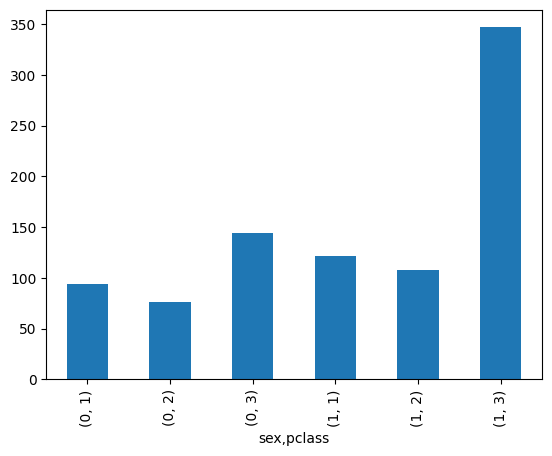

In [10]:
df_new['sex'] = df_new['sex'].replace({'male' : 1, 'female' : 0})
df_new_group = df_new.groupby(['sex','pclass'])['survived'].count().plot(kind='bar')

In [19]:
df_new.corr()

,survived,sex,pclass
survived,1.000000,-0.543351,-0.338481
sex,-0.543351,1.000000,0.131900
pclass,-0.338481,0.131900,1.000000


In [2]:
import numpy as np
import random

In [31]:
cube_list = np.random.randint(1, 7, size=1000).tolist()
cube_list[0:10]

[4, 3, 2, 5, 3, 6, 6, 2, 6, 1]

In [35]:
cube_arr = np.array(cube_list)
cube_arr[0:10]

array([4, 3, 2, 5, 3, 6, 6, 2, 6, 1])

In [44]:
print(f"Среднее значение по массиву: {np.mean(cube_arr)}")
print(f"Стандартное отклонение по массиву: {np.std(cube_arr)}")

Среднее значение по массиву: 3.5
Стандартное отклонение по массиву: 1.697056274847714


<Axes: ylabel='Count'>

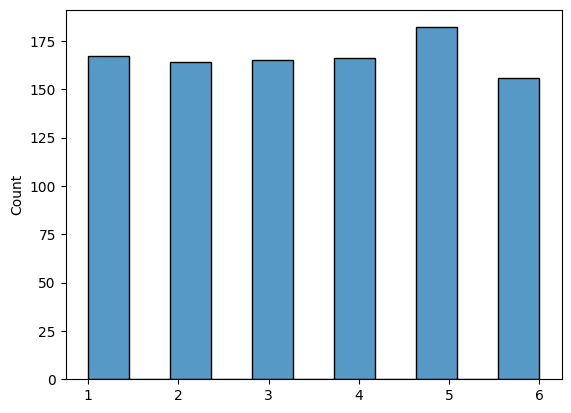

In [51]:
sns.histplot(cube_arr)

In [60]:
df = pd.DataFrame(cube_arr, columns=['value'])
df.head(10)

,value
0,4
1,3
2,2
3,5
4,3
5,6
6,6
7,2
8,6
9,1


value
5    182
1    167
4    166
3    165
2    164
6    156
Name: count, dtype: int64


<Axes: xlabel='value'>

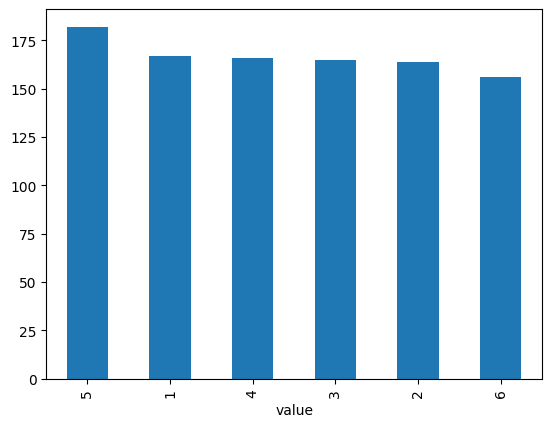

In [74]:
df_gr = df['value'].value_counts()
print(df_gr)
df_gr.plot(kind='bar')

---

# 1. Pandas: Группировка данных и агрегирование
Задача: У вас есть DataFrame с данными о продажах товаров в разных магазинах, включая столбцы store, product, sales, date. Используя Pandas, выполните следующие шаги:
Посчитайте общее количество продаж для каждого магазина.
Найдите среднее количество продаж по продуктам.
Создайте новый столбец, который будет показывать разницу в продажах между текущим и предыдущим месяцем.

In [11]:

np.random.seed(42)
stores = ['Store A', 'Store B', 'Store C']
products = ['Product 1', 'Product 2', 'Product 3']
dates = pd.date_range('2023-01-01', periods=100, freq='D')

In [12]:
data = {
    'store': np.random.choice(stores, size=100),
    'product': np.random.choice(products, size=100),
    'sales': np.random.randint(10, 100, size=100),
    'date': np.random.choice(dates, size=100)
}

df_sales = pd.DataFrame(data)

print(df_sales.head())

     store    product  sales       date
0  Store C  Product 3     61 2023-03-09
1  Store A  Product 3     71 2023-02-02
2  Store C  Product 3     67 2023-01-14
3  Store C  Product 1     61 2023-01-21
4  Store A  Product 3     21 2023-02-17


store
Store A    1736
Store B    1826
Store C    1700
Name: sales, dtype: int32


<Axes: xlabel='store'>

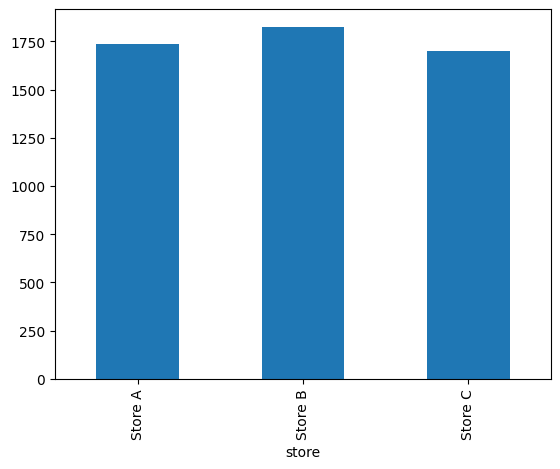

In [26]:
df_gr = df_sales.groupby(['store'])['sales'].sum()
print(df_gr)
df_gr.plot(kind='bar')

In [32]:
df_gr = df_sales.groupby(['product'])['sales'].mean()
print(df_gr)

product
Product 1    55.818182
Product 2    53.760000
Product 3    49.428571
Name: sales, dtype: float64


In [39]:
df_sales.sort_values(by='date')

,store,product,sales,date
75,Store B,Product 1,28,2023-01-02
34,Store C,Product 3,20,2023-01-04
44,Store A,Product 1,28,2023-01-06
7,Store B,Product 3,12,2023-01-07
92,Store A,Product 1,91,2023-01-07
...,...,...,...,...
54,Store B,Product 1,91,2023-04-07
23,Store B,Product 3,41,2023-04-08
86,Store C,Product 3,45,2023-04-09
45,Store C,Product 3,99,2023-04-09


In [58]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales['month'] = df_sales['date'].dt.to_period('M')
df_monthly_sales = df_sales.groupby(['month'])['sales'].sum().reset_index()
print(df_monthly_sales)

     month  sales
0  2023-01   1920
1  2023-02   1684
2  2023-03   1002
3  2023-04    656


In [56]:
df_monthly_sales['diff'] = df_monthly_sales['sales'] - df_monthly_sales['sales'].shift(1)
df_monthly_sales.head()

,month,sales,sales_diff,diff
0,2023-01,1920,NaN,NaN
1,2023-02,1684,-236.0,-236.0
2,2023-03,1002,-682.0,-682.0
3,2023-04,656,-346.0,-346.0


---

2. NumPy: Работа с массивами и операциями
Задача: Создайте два массива с помощью NumPy:
Первый массив должен быть случайно заполнен числами от 1 до 100 (размер 10x10).
Второй массив должен содержать только четные числа от 1 до 50. Затем:
Найдите среднее, стандартное отклонение и сумму всех чисел в первом массиве.
Создайте маску для второго массива, чтобы выбрать только те числа, которые больше 20, и найдите их среднее значение.

In [69]:
arr1 = np.random.randint(1, 100, size=(10,10))
print(f"Массив 1 = {arr1}")
arr2 = np.arange(1, 50, 2)
print(f"Массив 2 = {arr2}")

Массив 1 = [[ 6 67  7 51 72 42 64 15 29 33]
 [94 27 36 29 38 57 97 27 55 33]
 [68 86 66 10  5 74 97 38 13 31]
 [47 88 52 56 15 29  8  5 29 47]
 [68 76 45  2 27 95 36 36 26 43]
 [27 69 20 11 74 38  6 72 23 47]
 [90 46 12 90 13 62 82 89 97 60]
 [43 76 68  5 37 72 92 31  9 51]
 [29 78 40 41 86 11 23  1 46 21]
 [90 36 54 87 57  1 63 54 55 40]]
Массив 2 = [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


In [75]:
print(f"Среднее по массиву: {np.mean(arr1)}")
print(f"Стандартное отклонение по массиву: {np.std(arr1)}")
print(f"Сумма по массиву: {np.sum(arr1)}")

Среднее по массиву: 46.22
Стандартное отклонение по массиву: 27.577374784413394
Сумма по массиву: 4622


In [79]:
mask = arr2 > 20
selected = arr2[mask]
print(f"Результат {np.mean(selected)}")


Результат 35.0
